# Differential Privacy 이해 - 모든 스피너 경우의 수

환자 질병 유무 데이터가 주어질 때 스피너를 시행하여 발생할 수 있는 모든 경우에 대하여 데이터 처리를 하고 그 결과 질병 보유 환자 수가 어떻게 달라지는지 살펴봅니다.

## 1. 원본 데이터 준비

아래와 같은 조건으로 환자 질병 유무 데이터를 생성합니다.

* 환자 수: $N_{patient} = 5$
* 질병 보유 환자의 비율: $p_{disease} = 0.7$

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

def generate_patient_data(N_patient, p_disease):
    patient_data = np.empty(N_patient, dtype=bool)
    patient_data[:] = False
    
    disease_ids = np.random.choice(np.arange(N_patient), round(N_patient * p_disease), replace=False)
    patient_data[disease_ids] = True

    return patient_data

# Number of all the patients
N_patient = 5
# Ratio of patients that have disease
p_disease = 0.7

np.random.seed(7)

patient_data = generate_patient_data(N_patient, p_disease)
disease_count = np.count_nonzero(patient_data == True)
df = pd.DataFrame(patient_data.reshape(-1,N_patient), columns=['patient-0', 'patient-1', 'patient-2', 'patient-3', 'patient-4'])
df['count(True)'] = disease_count
df

,patient-0,patient-1,patient-2,patient-3,patient-4,count(True)
0,True,True,True,True,False,4


## 2. 불확실성 추가

전체 영역 중에서 밝은 부분의 면적이 차지하는 비율이 90%인 스피너를 사용하여 원본 데이터에 불확실성을 추가합니다. 

* $p_{light} = 0.9$ 

시행 결과로 바늘이 밝은 부분에서 멈추면 질병 유무를 그대로 유지하고 어두운 부분에서 멈추면 질병 유무를 뒤집어서 기록합니다.

![Imgur](https://i.imgur.com/8c4XwJ4.png)

이런 처리를 거쳐서 데이터를 공개하는 이유는 개별 환자의 질병을 특정하기 어렵게 만들어 환자의 개인정보가 침해될 가능성을 낮출 수 있기 때문입니다.

In [2]:
def process_patient_data(patient_data, spinner_results):
    patient_data_output = np.copy(patient_data)
    patient_data_output[spinner_results == False] = patient_data[spinner_results == False] != True
    return patient_data_output

## 3. 모든 스피너 경우의 수

환자의 수만큼 스피너를 시행해서 나오는 모든 경우의 수를 찾고 각각 데이터 처리 결과를 구하여 표시합니다.

In [3]:
from itertools import combinations

def get_spinner_combinations(N_patient, N_light):
    spinner_results_list = []
    count_true_list = []

    comb = combinations(np.arange(N_patient), N_light)
    for i in list(comb):
        spinner_results = np.empty(N_patient, dtype=bool)
        spinner_results[:] = False
        if len(i) > 0:
            spinner_results[np.array(i)] = True
        spinner_results_list.append(spinner_results)
        count_true_list.append(np.count_nonzero(spinner_results == True))
        
    return spinner_results_list, count_true_list

def get_processed_patient_data(patient_data, spinner_results_list):
    patient_data_output_list = []
    count_true_list = []

    for i in range(len(spinner_results_list)):
        patient_data_output = process_patient_data(patient_data, spinner_results_list[i])
        patient_data_output_list.append(patient_data_output)
        count_true_list.append(np.count_nonzero(patient_data_output == True))
        
    return patient_data_output_list, count_true_list

def plot_histogram(count_true_list):
    plt.hist(count_true_list, np.arange(7), align='left', rwidth=0.6)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.title('histogram for patient_data_output')
    plt.xlabel('count(True)')
    plt.ylabel('occurrences')
    plt.show()

### 3.1. $N_{light} = 5$ 인 경우

다섯 번의 스피너 시행에서 바늘이 모두 밝은 부분에서 멈추는 경우는 한 가지입니다.

* ${ _{ 5 }{ C }_{ 5 } } = 1$

In [4]:
N_light = 5
spinner_results_list, count_true_list = get_spinner_combinations(N_patient, N_light)
df = pd.DataFrame(spinner_results_list, columns=['spinner-0', 'spinner-1', 'spinner-2', 'spinner-3', 'spinner-4'])
df['count(True)'] = count_true_list
df

,spinner-0,spinner-1,spinner-2,spinner-3,spinner-4,count(True)
0,True,True,True,True,True,5


스피너 시행 결과에 따라 환자 데이터를 처리하고 각각의 경우에 대하여 질병 보유 환자의 수를 구한 결과는 아래와 같습니다.

In [5]:
patient_data_output_list, count_true_list = get_processed_patient_data(patient_data, spinner_results_list)
df = pd.DataFrame(patient_data_output_list, columns=['patient-0', 'patient-1', 'patient-2', 'patient-3', 'patient-4'])
df['count(True)'] = count_true_list
df

,patient-0,patient-1,patient-2,patient-3,patient-4,count(True)
0,True,True,True,True,False,4


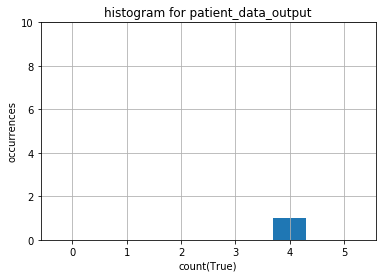

In [6]:
plot_histogram(count_true_list)

### 3.2. $N_{light} = 4$인 경우

다섯 번의 스피너 시행에서 바늘이 네 번 밝은 부분에서 멈추는 경우는 다섯 가지입니다.

* ${ _{ 5 }{ C }_{ 4 } } = 5$

In [7]:
N_light = 4
spinner_results_list, count_true_list = get_spinner_combinations(N_patient, N_light)
df = pd.DataFrame(spinner_results_list, columns=['spinner-0', 'spinner-1', 'spinner-2', 'spinner-3', 'spinner-4'])
df['count(True)'] = count_true_list
df

,spinner-0,spinner-1,spinner-2,spinner-3,spinner-4,count(True)
0,True,True,True,True,False,4
1,True,True,True,False,True,4
2,True,True,False,True,True,4
3,True,False,True,True,True,4
4,False,True,True,True,True,4


스피너 시행 결과에 따라 환자 데이터를 처리하고 각각의 경우에 대하여 질병 보유 환자의 수를 구한 결과는 아래와 같습니다.

In [8]:
patient_data_output_list, count_true_list = get_processed_patient_data(patient_data, spinner_results_list)
df = pd.DataFrame(patient_data_output_list, columns=['patient-0', 'patient-1', 'patient-2', 'patient-3', 'patient-4'])
df['count(True)'] = count_true_list
df

,patient-0,patient-1,patient-2,patient-3,patient-4,count(True)
0,True,True,True,True,True,5
1,True,True,True,False,False,3
2,True,True,False,True,False,3
3,True,False,True,True,False,3
4,False,True,True,True,False,3


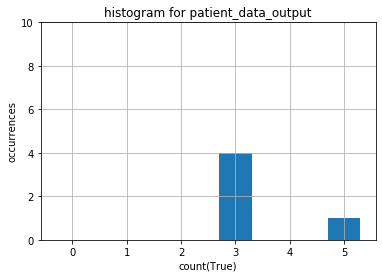

In [9]:
plot_histogram(count_true_list)

### 3.3. $N_{light} = 3$인 경우

다섯 번의 스피너 시행에서 바늘이 세 번 밝은 부분에서 멈추는 경우는 열 가지입니다.

* ${ _{ 5 }{ C }_{ 3 } } = 10$

In [10]:
N_light = 3
spinner_results_list, count_true_list = get_spinner_combinations(N_patient, N_light)
df = pd.DataFrame(spinner_results_list, columns=['spinner-0', 'spinner-1', 'spinner-2', 'spinner-3', 'spinner-4'])
df['count(True)'] = count_true_list
df

,spinner-0,spinner-1,spinner-2,spinner-3,spinner-4,count(True)
0,True,True,True,False,False,3
1,True,True,False,True,False,3
2,True,True,False,False,True,3
3,True,False,True,True,False,3
4,True,False,True,False,True,3
5,True,False,False,True,True,3
6,False,True,True,True,False,3
7,False,True,True,False,True,3
8,False,True,False,True,True,3
9,False,False,True,True,True,3


스피너 시행 결과에 따라 환자 데이터를 처리하고 각각의 경우에 대하여 질병 보유 환자의 수를 구한 결과는 아래와 같습니다.

In [11]:
patient_data_output_list, count_true_list = get_processed_patient_data(patient_data, spinner_results_list)
df = pd.DataFrame(patient_data_output_list, columns=['patient-0', 'patient-1', 'patient-2', 'patient-3', 'patient-4'])
df['count(True)'] = count_true_list
df

,patient-0,patient-1,patient-2,patient-3,patient-4,count(True)
0,True,True,True,False,True,4
1,True,True,False,True,True,4
2,True,True,False,False,False,2
3,True,False,True,True,True,4
4,True,False,True,False,False,2
5,True,False,False,True,False,2
6,False,True,True,True,True,4
7,False,True,True,False,False,2
8,False,True,False,True,False,2
9,False,False,True,True,False,2


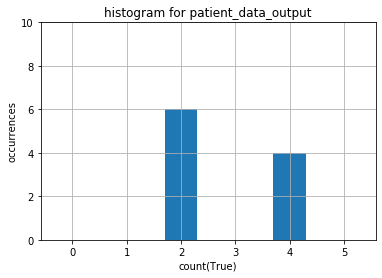

In [12]:
plot_histogram(count_true_list)

### 3.4. $N_{light} = 2$인 경우

다섯 번의 스피너 시행에서 바늘이 두 번 밝은 부분에서 멈추는 경우는 열 가지입니다.

* ${ _{ 5 }{ C }_{ 2 } } = 10$

In [13]:
N_light = 2
spinner_results_list, count_true_list = get_spinner_combinations(N_patient, N_light)
df = pd.DataFrame(spinner_results_list, columns=['spinner-0', 'spinner-1', 'spinner-2', 'spinner-3', 'spinner-4'])
df['count(True)'] = count_true_list
df

,spinner-0,spinner-1,spinner-2,spinner-3,spinner-4,count(True)
0,True,True,False,False,False,2
1,True,False,True,False,False,2
2,True,False,False,True,False,2
3,True,False,False,False,True,2
4,False,True,True,False,False,2
5,False,True,False,True,False,2
6,False,True,False,False,True,2
7,False,False,True,True,False,2
8,False,False,True,False,True,2
9,False,False,False,True,True,2


스피너 시행 결과에 따라 환자 데이터를 처리하고 각각의 경우에 대하여 질병 보유 환자의 수를 구한 결과는 아래와 같다.

In [14]:
patient_data_output_list, count_true_list = get_processed_patient_data(patient_data, spinner_results_list)
df = pd.DataFrame(patient_data_output_list, columns=['patient-0', 'patient-1', 'patient-2', 'patient-3', 'patient-4'])
df['count(True)'] = count_true_list
df

,patient-0,patient-1,patient-2,patient-3,patient-4,count(True)
0,True,True,False,False,True,3
1,True,False,True,False,True,3
2,True,False,False,True,True,3
3,True,False,False,False,False,1
4,False,True,True,False,True,3
5,False,True,False,True,True,3
6,False,True,False,False,False,1
7,False,False,True,True,True,3
8,False,False,True,False,False,1
9,False,False,False,True,False,1


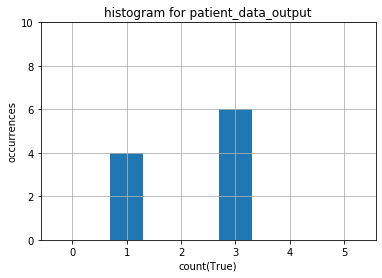

In [15]:
plot_histogram(count_true_list)

### 3.5. $N_{light} = 1$인 경우

다섯 번의 스피너 시행에서 바늘이 한 번 밝은 부분에서 멈추는 경우는 다섯 가지입니다.

* ${ _{ 5 }{ C }_{ 1 } } = 5$

In [16]:
N_light = 1
spinner_results_list, count_true_list = get_spinner_combinations(N_patient, N_light)
df = pd.DataFrame(spinner_results_list, columns=['spinner-0', 'spinner-1', 'spinner-2', 'spinner-3', 'spinner-4'])
df['count(True)'] = count_true_list
df

,spinner-0,spinner-1,spinner-2,spinner-3,spinner-4,count(True)
0,True,False,False,False,False,1
1,False,True,False,False,False,1
2,False,False,True,False,False,1
3,False,False,False,True,False,1
4,False,False,False,False,True,1


스피너 시행 결과에 따라 환자 데이터를 처리하고 각각의 경우에 대하여 질병 보유 환자의 수를 구한 결과는 아래와 같습니다.

In [17]:
patient_data_output_list, count_true_list = get_processed_patient_data(patient_data, spinner_results_list)
df = pd.DataFrame(patient_data_output_list, columns=['patient-0', 'patient-1', 'patient-2', 'patient-3', 'patient-4'])
df['count(True)'] = count_true_list
df

,patient-0,patient-1,patient-2,patient-3,patient-4,count(True)
0,True,False,False,False,True,2
1,False,True,False,False,True,2
2,False,False,True,False,True,2
3,False,False,False,True,True,2
4,False,False,False,False,False,0


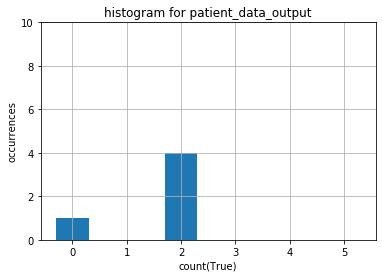

In [18]:
plot_histogram(count_true_list)

### 3.6. $N_{light} = 0$인 경우

다섯 번의 스피너 시행에서 바늘이 모두 어두운 부분에서 멈추는 경우는 한 가지입니다.

* ${ _{ 5 }{ C }_{ 0 } } = 1$

In [19]:
N_light = 0
spinner_results_list, count_true_list = get_spinner_combinations(N_patient, N_light)
df = pd.DataFrame(spinner_results_list, columns=['spinner-0', 'spinner-1', 'spinner-2', 'spinner-3', 'spinner-4'])
df['count(True)'] = count_true_list
df

,spinner-0,spinner-1,spinner-2,spinner-3,spinner-4,count(True)
0,False,False,False,False,False,0


스피너 시행 결과에 따라 환자 데이터를 처리하고 각각의 경우에 대하여 질병 보유 환자의 수를 구한 결과는 아래와 같습니다.

In [20]:
patient_data_output_list, count_true_list = get_processed_patient_data(patient_data, spinner_results_list)
df = pd.DataFrame(patient_data_output_list, columns=['patient-0', 'patient-1', 'patient-2', 'patient-3', 'patient-4'])
df['count(True)'] = count_true_list
df

,patient-0,patient-1,patient-2,patient-3,patient-4,count(True)
0,False,False,False,False,True,1


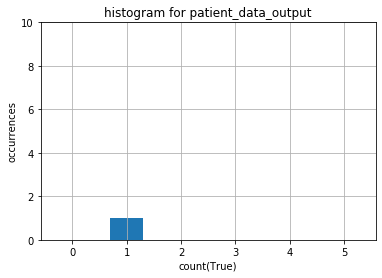

In [21]:
plot_histogram(count_true_list)

## 4. 종합

위에서 다룬 모든 경우의 수는 서른 두 가지입니다.

* $_5C_5 + _5C_4 + _5C_3 + _5C_2 + _5C_1 + _5C_0 = 1 + 5 + 10 + 10 + 5 + 1 = 32$

In [22]:
spinner_results_list = []
count_true_list = []

for i in range(N_patient + 1):
    N_light = N_patient - i
    temp_spinner_results_list, temp_count_true_list = get_spinner_combinations(N_patient, N_light)
    spinner_results_list += temp_spinner_results_list
    count_true_list += temp_count_true_list
    
df = pd.DataFrame(spinner_results_list, columns=['spinner-0', 'spinner-1', 'spinner-2', 'spinner-3', 'spinner-4'])
df['count(True)'] = count_true_list
df

,spinner-0,spinner-1,spinner-2,spinner-3,spinner-4,count(True)
0,True,True,True,True,True,5
1,True,True,True,True,False,4
2,True,True,True,False,True,4
3,True,True,False,True,True,4
4,True,False,True,True,True,4
5,False,True,True,True,True,4
6,True,True,True,False,False,3
7,True,True,False,True,False,3
8,True,True,False,False,True,3
9,True,False,True,True,False,3


스피너 시행 결과에 따라 환자 데이터를 처리하고 각각의 경우에 대하여 질병 보유 환자의 수를 구한 결과는 아래와 같습니다.

In [23]:
patient_data_output_list, count_true_list = get_processed_patient_data(patient_data, spinner_results_list)
df = pd.DataFrame(patient_data_output_list, columns=['patient-0', 'patient-1', 'patient-2', 'patient-3', 'patient-4'])
df['count(True)'] = count_true_list
df

,patient-0,patient-1,patient-2,patient-3,patient-4,count(True)
0,True,True,True,True,False,4
1,True,True,True,True,True,5
2,True,True,True,False,False,3
3,True,True,False,True,False,3
4,True,False,True,True,False,3
5,False,True,True,True,False,3
6,True,True,True,False,True,4
7,True,True,False,True,True,4
8,True,True,False,False,False,2
9,True,False,True,True,True,4


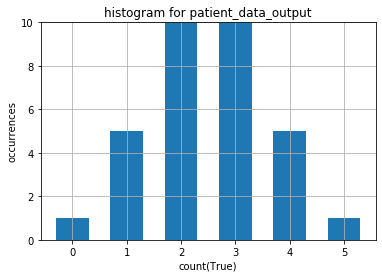

In [24]:
plot_histogram(count_true_list)

## 5. 정리

환자 질병 유무 데이터가 주어질 때 스피너를 시행하여 발생할 수 있는 모든 경우에 대하여 데이터 처리를 하고 그 결과 질병 보유 환자 수가 어떻게 달라지는지 살펴보았습니다.

여기서 짚고 넘어갈 점은 $p_{light}$가 0.9인 스피너를 사용하여 <u>실제로 시행을 해 보면 각각의 경우가 동일한 확률로 일어나지는 않는다</u>는 것입니다. 이 문서에서는 이를 고려하지 않았기 때문에 단원 4의 도수분포표가 중간 지점에서 볼록한 형태로 나왔습니다. $p_{light}$가 0.9인 점을 고려한다면 스피너가 밝은 부분에서 멈추는 경우가 더 자주 발생할 것이고 이는 질병 유무를 뒤집는 경우가 더 줄어든다는 것을 의미합니다. 그 결과로 도수분포표의 볼록한 부분이 원본 데이터의 질병 보유 환자 수인 4 근방에서 나타날 것이라고 추정할 수 있습니다. 이에 대한 자세한 설명은 다른 문서에서 다루고자 합니다.